# Description

#### O Desafio

Você faz parte do time de cientistas de dados da empres All In One Place, que precisa determinar quem são os clientes elegíveis para participar do Insiders. Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de modo a aumentar o faturamento e a frequência de compra.
Como resultado para esse projeto, é esperado que você entregue um lista de pessoas elegíveis a participar do programa Insiders, junto com um relatório respondendo às seguintes perguntas:

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
2. Quantos clinetes farão parte do grupo?
3. Quais as principais características desses clientes?
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
6. Quais as condições para uma pessoa ser elegível ao Insiders?
7. Quais as condições para uma pessoa ser removida do Insiders?
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

#### Os dados

- Invoice Number: Identificador único de cada transação.
- Stock Code Product: Código do item
- Description Product: nome do item
- Quantity: A quantidade de item comprado por transação.
- Invoice Date: O dia em que a transação ocorreu.
- Unit Price: Preço do produto por unidade.
- Customer ID: Identificador único do cliente
- Country: O nome do pais que o cliente reside.

# Solution Planning

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
    - Monetário
        - valor médio dos pedidos
        - LTV
        - valor total dos pedidos
    - Recencia
        - Quantas vezes o cliente comprou
    - Frequencia
        - Frequencia de compra
        
        
2. Quantos clinetes farão parte do grupo?
    - Total de clientes + percentual sobre a base.
    
    
3. Quais as principais características desses clientes?
    - Lista das principais caracteristicas de compra.


4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
    - Percentual de faturamento do grupo sobre o total de vendas.


5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Previsão de faturamento.

6. Quais as condições para uma pessoa ser elegível ao Insiders?
7. Quais as condições para uma pessoa ser removida do Insiders?
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste A\B
    - Teste A\B gausiano
    - 


9. Quais ações o time de marketing pode realizar para aumentar o faturamento?


#### Benchmark

- RFM
    - https://www.optimove.com/resources/learning-center/customer-segmentation-via-cluster-analysis
    - https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis?
    - https://www.omniconvert.com/blog/rfm-score/ - segments
- K-Means
    - https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
    - Elbow Method Visualizer
    
    
        from yekkiwbrick.cluster import KElbowVisualiser
        Elbow_M = KElbowVisualizer(KMeans(), k=10)
        Elbow_M.fit(PCA_ds)
        Elbow_M.show()

#### Ideias de entrega
- Começar aplicando RFM para gerar valor e trazer as principais caracteristicas dos clientes.
- Relatório de Insights
- Algoritmo K-means (usar RFM para entrada)
- Relatório Final

#### Ideias para outros algoritmos
- Ativação de recompra
    - Identificar o momento certo de mandar propagandas e promoções para o cliente 'lembrar' de comprar na loja.
- Previsão de classificação
    - Prever em qual classificação o cliente vai se encaixar. Com isso podemos direcionar o marketing para que ele possa subir no nosso rank de clientes.

# 0. Imports & Help Functions

## 0.1 Imports

In [208]:
import inflection

import pandas     as pd
import numpy      as np
import seaborn    as sns
import umap.umap_ as umap

from matplotlib import pyplot  as plt
from sklearn    import metrics as mt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster       import KMeans
from yellowbrick.cluster   import KElbowVisualizer, SilhouetteVisualizer

## 0.2 Data Import

In [2]:
df_raw = pd.read_csv('dataset/ecommerce.csv', encoding='windows-1252')
df_raw = df_raw.drop(columns='Unnamed: 8')

# 1. Data Description

In [3]:
df1 = df_raw.copy()

In [4]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1 Rename Columns

In [5]:
old_columns = df1.columns
snekecase = lambda x: inflection.underscore(x)
new_columns = list(map(snekecase, old_columns))
df1.columns = new_columns

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.2 Data Dimensions

In [6]:
# print("Linhas: {}".format(df1.shape[0]))
# print("Colunas: {}".format(df1.shape[1]))

## 1.3 Data Dtypes

In [7]:
# df1.dtypes

## 1.4 Check NA

In [8]:
# df1.isna().sum()

## 1.5 Conclusions About the Data

No momento do treino do modelo eu não vou precisar dos dados de descrição do produto (description), por que o número de armazenagem (stock_code) já me passa a ideia de qual produto se trata.

Preciso fazer o drop das linhas que não tem dados no customer_id por precisar agrupar meus clientes e sem esse dado eu não sei quem comprou o produto x ou y.

## 1.6 FillOut NA

In [9]:
# drop missing data
df1 = df1[df1['customer_id'].isnull() == False]

# Total invoice price
df1['total_invoice_price'] = df1['quantity'] * df1['unit_price']

# Convert invoice_date to datetime
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

# Invoice day
df1['invoice_day'] = df1['invoice_date'].apply(lambda x: x.day)

# Invoice month
df1['invoice_month'] = df1['invoice_date'].apply(lambda x: x.month)

# Invoice year
df1['invoice_year'] = df1['invoice_date'].apply(lambda x: x.year)

df1

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_invoice_price,invoice_day,invoice_month,invoice_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,15.30,29,11,2016
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,20.34,29,11,2016
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,22.00,29,11,2016
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,20.34,29,11,2016
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,20.34,29,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680.0,France,10.20,7,12,2017
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680.0,France,12.60,7,12,2017
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680.0,France,16.60,7,12,2017
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680.0,France,16.60,7,12,2017


## <s>1.7 Charge Dtypes</s>

## 1.8 Descriptive Statistical

In [10]:
df_num = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.8.1 Numerical Attributes

In [11]:
d1 = pd.DataFrame (df_num.min()).T
d2 = pd.DataFrame (df_num.max()).T
d3 = pd.DataFrame (df_num.max() - df_num.min()).T
d4 = pd.DataFrame (df_num.mean()).T
d5 = pd.DataFrame (df_num.median()).T
d6 = pd.DataFrame (df_num.std()).T
d7 = pd.DataFrame (df_num.skew()).T
d8 = pd.DataFrame (df_num.kurt()).T

df_num = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8]).T.reset_index()
df_num.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'standard_deviation', 'skewness', 'kurtosis']

df_num


,attributes,min,max,range,mean,median,standard_deviation,skewness,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693370,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315162,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.600303,0.029835,-1.179982
3,total_invoice_price,-168469.6,168469.6,336939.2,20.401854,11.10,427.591718,-0.056982,124024.422429
4,invoice_day,1.0,31.0,30.0,14.999398,15.00,8.797426,0.122230,-1.194347
5,invoice_month,1.0,12.0,11.0,7.541259,8.00,3.409613,-0.451482,-1.069259
6,invoice_year,2016.0,2017.0,1.0,2016.934002,2017.00,0.248279,-3.496094,10.222720


In [12]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
min,7.0,-33585.800000,67333.303290,-168469.600000,-40497.500000,1.000000,1008.500000,12346.000000
max,7.0,44111.657143,62153.670770,12.000000,1024.000000,18287.000000,59982.500000,168469.600000
range,7.0,77697.457143,128494.149072,1.000000,20.500000,5941.000000,100480.000000,336939.200000
mean,7.0,2480.441265,5696.698447,3.460471,9.801281,14.999398,1018.667928,15287.690570
median,7.0,2458.578571,5647.116873,1.950000,6.500000,11.100000,1016.000000,15152.000000
standard_deviation,7.0,353.093696,620.923591,0.248279,6.103519,69.315162,338.142544,1713.600303
skewness,7.0,64.078456,171.158884,-3.496094,-0.254232,0.029835,0.152446,452.219019
kurtosis,7.0,66467.615460,95152.494169,-1.194347,-1.124621,10.222720,109170.993051,246924.542988


### 1.8.2 Descriptive Attributes

In [13]:
df_cat.apply(lambda x: x.unique().shape[0])

invoice_no     22190
stock_code      3684
description     3896
country           37
dtype: int64

# 2. RFM

In [25]:
df2 = df1.copy()

In [26]:
df2 = df2[(df2['invoice_year'] == 2017) 
          & (df2['invoice_month'] >= 10) 
          & (df2['invoice_month'] < 12)].reset_index(drop=True)

## 2.1 Create user DataFrame

In [27]:
# recency
aux1 = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()

# frequency
aux2 = df2[['customer_id', 'invoice_no','invoice_date']].groupby(['customer_id', 'invoice_no']).count().reset_index()[['customer_id', 'invoice_date']]
aux2.columns = ['customer_id', 'invoice_date_count']

# Monetary
aux3 = df2[['customer_id', 'total_invoice_price']].groupby('customer_id').sum()

# Join DataFrames
df_customer = pd.merge(aux1, aux2, on='customer_id')
df_customer = pd.merge(df_customer, aux3, on='customer_id')

df_customer.head()

,customer_id,invoice_date,invoice_date_count,total_invoice_price
0,12347.0,2017-10-29,47,1294.32
1,12349.0,2017-11-19,73,1757.55
2,12352.0,2017-11-01,15,311.73
3,12356.0,2017-11-15,2,58.35
4,12357.0,2017-11-04,131,6207.67


## 2.2 RFM (recency, frequency, monetary)

In [28]:
# recency rank
df_customer = df_customer.sort_values('invoice_date', ascending=False).reset_index(drop=True)
df_customer['recency'] = 0

for i in range(len(df_customer)):
    if i <= (len(df_customer)*.2):
        df_customer.loc[i, 'recency'] = 5
        continue
    if i <= (len(df_customer)*.4):
        df_customer.loc[i, 'recency'] = 4
        continue
    if i <= (len(df_customer)*.6):
        df_customer.loc[i, 'recency'] = 3
        continue
    if i <= (len(df_customer)*.8):
        df_customer.loc[i, 'recency'] = 2
        continue
    else:
        df_customer.loc[i, 'recency'] = 1

In [29]:
# Frequency rank
df_customer = df_customer.sort_values('invoice_date_count', ascending=False).reset_index(drop=True)
df_customer['frequency'] = 0

for i in range(len(df_customer)):
    if i <= (len(df_customer)*.2):
        df_customer.loc[i, 'frequency'] = 5
        continue
    if i <= (len(df_customer)*.4):
        df_customer.loc[i, 'frequency'] = 4
        continue
    if i <= (len(df_customer)*.6):
        df_customer.loc[i, 'frequency'] = 3
        continue
    if i <= (len(df_customer)*.8):
        df_customer.loc[i, 'frequency'] = 2
        continue
    else:
        df_customer.loc[i, 'frequency'] = 1

In [30]:
# Monetary rank
df_customer = df_customer.sort_values('total_invoice_price', ascending=False).reset_index(drop=True)
df_customer['monetary'] = 0

for i in range(len(df_customer)):
    if i <= (len(df_customer)*.2):
        df_customer.loc[i, 'monetary'] = 5
        continue
    if i <= (len(df_customer)*.4):
        df_customer.loc[i, 'monetary'] = 4
        continue
    if i <= (len(df_customer)*.6):
        df_customer.loc[i, 'monetary'] = 3
        continue
    if i <= (len(df_customer)*.8):
        df_customer.loc[i, 'monetary'] = 2
        continue
    else:
        df_customer.loc[i, 'monetary'] = 1

In [31]:
df_customer['total_rank'] = df_customer['recency'] + df_customer['frequency'] + df_customer['monetary']

In [32]:
df_customer['class'] = '0'
for i in range(len(df_customer)):
    if df_customer.loc[i, 'recency'] == 5 and df_customer.loc[i, 'frequency'] == 5:
        df_customer.loc[i, 'class'] = 'champion'
        continue
    if 3 <= df_customer.loc[i, 'recency'] <= 4 and 4 <= df_customer.loc[i, 'frequency'] <= 5:
        df_customer.loc[i, 'class'] = 'loyal_customer'
        continue
    if 4 <= df_customer.loc[i, 'recency'] <= 5 and 2 <= df_customer.loc[i, 'frequency'] <= 4:
        df_customer.loc[i, 'class'] = 'potential_loyal'
        continue
    if df_customer.loc[i, 'recency'] == 5 and df_customer.loc[i, 'frequency'] == 1:
        df_customer.loc[i, 'class'] = 'new_customer'
        continue
    if df_customer.loc[i, 'recency'] == 4 and df_customer.loc[i, 'frequency'] == 1:
        df_customer.loc[i, 'class'] = 'promissing'
        continue
    if df_customer.loc[i, 'recency'] == 3 and 1 <= df_customer.loc[i, 'frequency'] <= 2:
        df_customer.loc[i, 'class'] = 'abount_to_sleep'
        continue
    if df_customer.loc[i, 'recency'] == 3 and df_customer.loc[i, 'frequency'] == 3:
        df_customer.loc[i, 'class'] = 'need_attention'
        continue
    if df_customer.loc[i, 'recency'] == 2 and df_customer.loc[i, 'frequency'] == 2:
        df_customer.loc[i, 'class'] = 'hibernation'
        continue
    if df_customer.loc[i, 'recency'] <= 2 and df_customer.loc[i, 'frequency'] <= 2:
        df_customer.loc[i, 'class'] = 'lost'
        continue
    if df_customer.loc[i, 'recency'] == 1 and df_customer.loc[i, 'frequency'] == 5:
        df_customer.loc[i, 'class'] = 'don_not_lose_then'
        continue
    if 1 <= df_customer.loc[i, 'recency'] <= 2 and 3 <= df_customer.loc[i, 'frequency'] <= 5:
        df_customer.loc[i, 'class'] = 'at_risk'
        continue
        
df_customer

,customer_id,invoice_date,invoice_date_count,total_invoice_price,recency,frequency,monetary,total_rank,class
0,18102.0,2017-11-26,14,68012.35,4,3,5,12,potential_loyal
1,18102.0,2017-11-26,1,68012.35,4,1,5,10,promissing
2,18102.0,2017-11-26,4,68012.35,4,2,5,11,potential_loyal
3,18102.0,2017-11-26,7,68012.35,4,2,5,11,potential_loyal
4,18102.0,2017-11-26,11,68012.35,4,3,5,12,potential_loyal
...,...,...,...,...,...,...,...,...,...
5597,15365.0,2017-11-12,36,-614.70,2,5,1,8,at_risk
5598,15365.0,2017-11-12,11,-614.70,2,3,1,6,at_risk
5599,15365.0,2017-11-12,1,-614.70,2,1,1,4,lost
5600,15365.0,2017-11-12,1,-614.70,2,1,1,4,lost


In [33]:
result = df_customer.groupby('class')['total_invoice_price'].mean().reset_index().sort_values('total_invoice_price', ascending=False)

<AxesSubplot:xlabel='class', ylabel='total_invoice_price'>

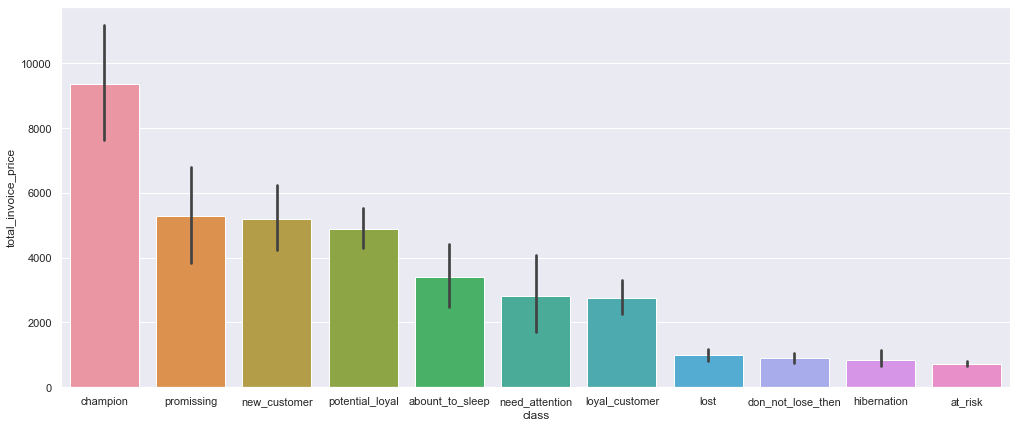

In [34]:
sns.set(rc={'figure.figsize':(17,7)})
sns.barplot(data=df_customer, x='class', y='total_invoice_price', order=result['class'])

In [35]:
df_customer[['class', 'total_invoice_price']].groupby('class').mean().sort_values('total_invoice_price', ascending=False).reset_index()

,class,total_invoice_price
0,champion,9376.259073
1,promissing,5283.104416
2,new_customer,5187.215929
3,potential_loyal,4882.218956
4,abount_to_sleep,3414.902828
5,need_attention,2818.623640
6,loyal_customer,2745.944671
7,lost,985.953412
8,don_not_lose_then,887.840449
9,hibernation,852.403247


In [36]:
aux1 = df_customer[['class', 'customer_id']].groupby('class').count().sort_values('customer_id', ascending=False).reset_index()
aux1['%'] = aux1['customer_id'] / aux1['customer_id'].sum()

aux1

,class,customer_id,%
0,at_risk,1162,0.207426
1,potential_loyal,1102,0.196715
2,loyal_customer,897,0.160121
3,lost,639,0.114066
4,abount_to_sleep,435,0.077651
5,new_customer,253,0.045162
6,don_not_lose_then,245,0.043734
7,need_attention,239,0.042663
8,promissing,231,0.041235
9,champion,205,0.036594


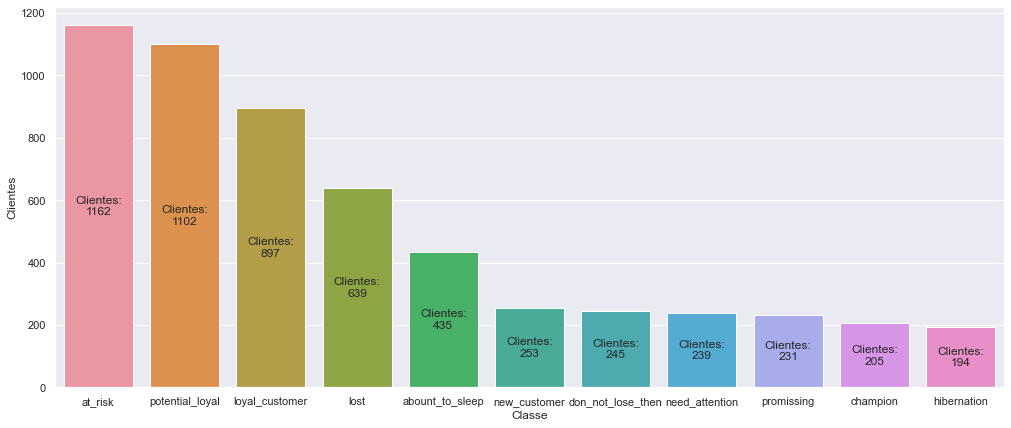

In [37]:
fig, ax = plt.subplots(figsize=(17, 7))

# add the plot
sns.barplot(x='class', y='customer_id', data=aux1, capsize=0.2, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Clientes:\n%.0f', label_type='center')

ax.set(ylabel='Clientes', xlabel='Classe')
plt.show()

In [38]:
aux1[['class', '%']]

,class,%
0,at_risk,0.207426
1,potential_loyal,0.196715
2,loyal_customer,0.160121
3,lost,0.114066
4,abount_to_sleep,0.077651
5,new_customer,0.045162
6,don_not_lose_then,0.043734
7,need_attention,0.042663
8,promissing,0.041235
9,champion,0.036594


In [39]:
aux2 = df_customer[['class', 'total_invoice_price']].groupby('class').sum().sort_values('total_invoice_price', ascending=False).reset_index()
aux2['%'] = aux2['total_invoice_price'] / aux2['total_invoice_price'].sum()

aux2

,class,total_invoice_price,%
0,potential_loyal,5380205.29,0.329817
1,loyal_customer,2463112.37,0.150994
2,champion,1922133.11,0.117830
3,abount_to_sleep,1485482.73,0.091063
4,new_customer,1312365.63,0.080451
5,promissing,1220397.12,0.074813
6,at_risk,842442.40,0.051643
7,need_attention,673651.05,0.041296
8,lost,630024.23,0.038622
9,don_not_lose_then,217520.91,0.013334


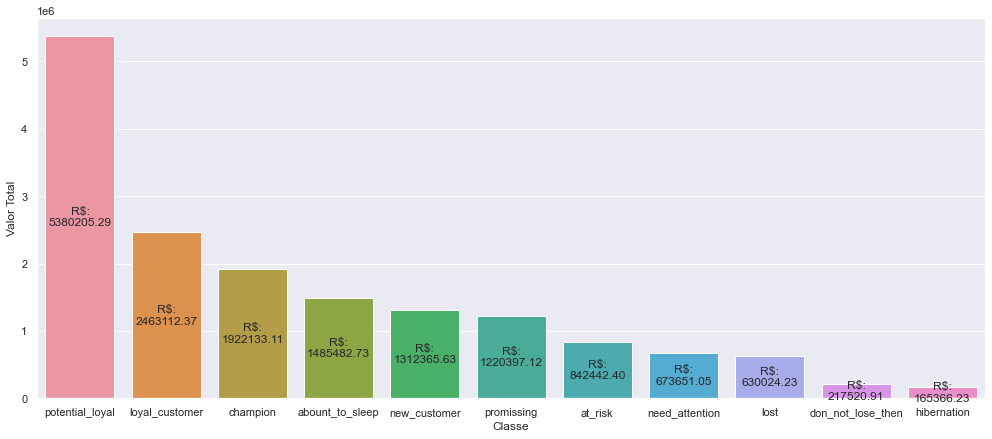

In [40]:
fig, ax = plt.subplots(figsize=(17, 7))

# add the plot
sns.barplot(x='class', y='total_invoice_price', data=aux2, capsize=0.2, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='R$:\n%.2f', label_type='center')

ax.set(ylabel='Valor Total', xlabel='Classe')
plt.show()

# 3. Feature Engineering

In [50]:
df3 = df2.copy()

In [74]:
# A Letra C na frente do invoice_no tem a ver com a devolução ou cancelamento da compra.
df3 = df3[df3['total_invoice_price'] > 0].reset_index(drop=True)

In [72]:
# códigos utilizados no stock_code
# ['DOT', 'CRUK', 'POST', 'M', 'C2', 'D', 'BANK CHARGES']
# df3[df3['stock_code'].str.match('[a-zA-Z]')]['stock_code'].unique()

array(['DOT', 'CRUK', 'POST', 'M', 'C2', 'D', 'BANK CHARGES'],
      dtype=object)

customer_id = identificação do cliente
invoice_no = numero do pedido
itens_qtt = quantidade de itens diferentes comprados
total_qtt = quantida total de itens
total_invoice_price = valor total do pedido
country = país
invoice_date = data da compra

In [79]:
# Retirada dos itens de estoque com letras
df3 = df3[df3['stock_code'].str.match('^\d+$')].reset_index(drop=True)

In [160]:
# Criação da quantidade de itens
aux1 = df3[['invoice_no', 'stock_code']].groupby('invoice_no').count().reset_index()
aux1.columns = ['invoice_no', 'itens_qtt']

# Criação do valor total do pedido
aux2 = df3[['invoice_no', 'quantity', 'total_invoice_price']].groupby('invoice_no').sum().reset_index()
aux2.columns = ['invoice_no', 'total_qtt', 'total_invoice_price']

# Separação das demais features
aux3 = df3[['customer_id', 'invoice_no', 'invoice_date', 'country', 'invoice_day']].groupby(['customer_id', 'invoice_no', 'invoice_date', 'country']).sum().reset_index()
aux3 = aux3[['customer_id', 'invoice_no', 'invoice_date', 'country']]

# Merge entre as tabelas
df3_new = pd.merge(aux1, aux2, on='invoice_no')
df3_new = pd.merge(df3_new, aux3, on='invoice_no')

df3_new = df3_new[['customer_id', 'invoice_no', 'itens_qtt', 'total_qtt', 'total_invoice_price', 'invoice_date', 'country']]

df3_new['customer_id'] = df3_new['customer_id'].astype(np.int64())
df3_new['invoice_no'] = df3_new['invoice_no'].astype(np.int64())

# Invoice day
df3_new['invoice_day'] = df3_new['invoice_date'].apply(lambda x: x.day)

# Invoice month
df3_new['invoice_month'] = df3_new['invoice_date'].apply(lambda x: x.month)

# Invoice year
df3_new['invoice_year'] = df3_new['invoice_date'].apply(lambda x: x.year)

df3_new.head()

,customer_id,invoice_no,itens_qtt,total_qtt,total_invoice_price,invoice_date,country,invoice_day,invoice_month,invoice_year
0,14644,569239,18,192,643.26,2017-10-01,United Kingdom,1,10,2017
1,18059,569240,5,80,114.96,2017-10-01,United Kingdom,1,10,2017
2,14488,569241,44,775,1034.28,2017-10-01,United Kingdom,1,10,2017
3,14193,569242,17,171,400.85,2017-10-01,United Kingdom,1,10,2017
4,13344,569243,33,250,531.49,2017-10-01,United Kingdom,1,10,2017


# 4. Exploratory Data Analysis

In [161]:
df4 = df3_new.copy()

D:\Users\gtvmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


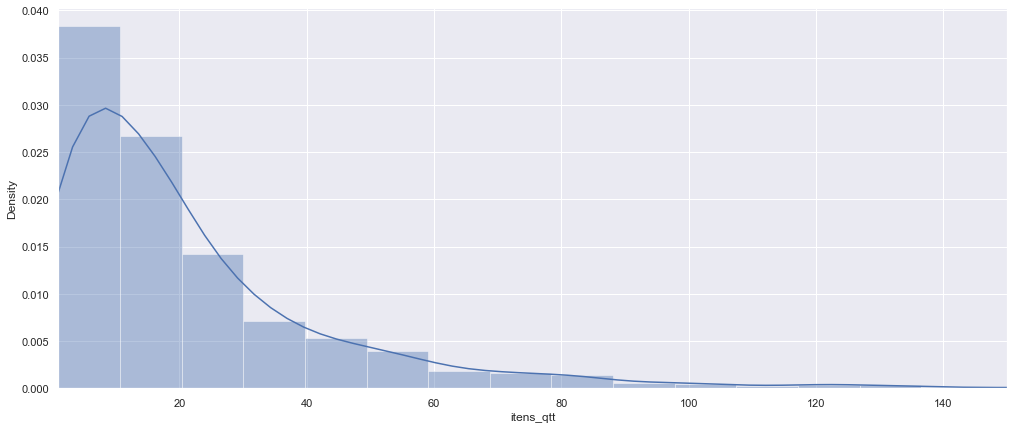

In [126]:
fig, ax = plt.subplots()
sns.distplot(df4['itens_qtt'], ax=ax)
ax.set_xlim(1, 150)
plt.show()


D:\Users\gtvmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


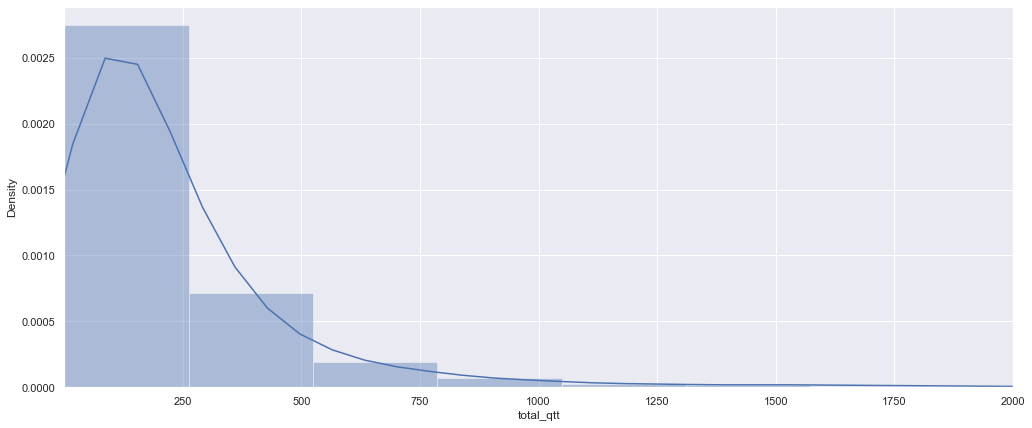

In [127]:
fig, ax = plt.subplots()
sns.distplot(df4['total_qtt'], ax=ax)
ax.set_xlim(1, 2000)
plt.show()

D:\Users\gtvmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


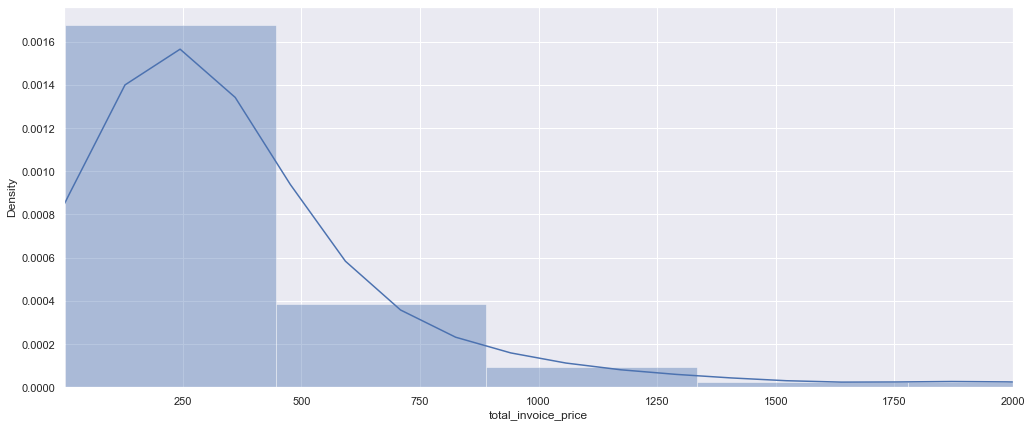

In [129]:
fig, ax = plt.subplots()
sns.distplot(df4['total_invoice_price'], ax=ax)
ax.set_xlim(1, 2000)
plt.show()

# 5. Data Preparation

In [162]:
df5 = df4.copy()

## 5.1 Tranformation

### 5.1.1 Encoding

In [166]:
le = LabelEncoder()
df5['country'] = le.fit_transform(df5['country'])

# 6. Feature Selection

In [167]:
df6 = df5.copy()

In [168]:
train = df6[['itens_qtt', 'total_qtt', 'total_invoice_price', 'country','invoice_day',
       'invoice_month', 'invoice_year']]

# 7. Machine Learning Modeling

In [169]:
clusters = [2, 3, 4, 5, 6, 7]

D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\clust

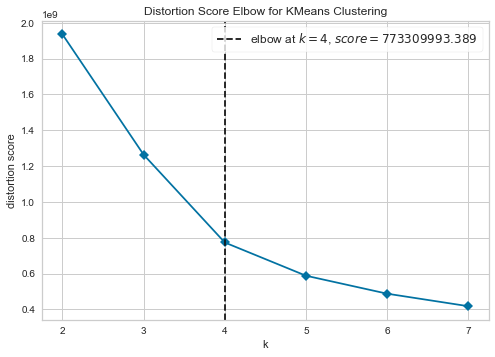

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [184]:
Elbow_M = KElbowVisualizer(KMeans(), k=clusters, timings=False)
Elbow_M.fit(train)
Elbow_M.show()

D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\clust

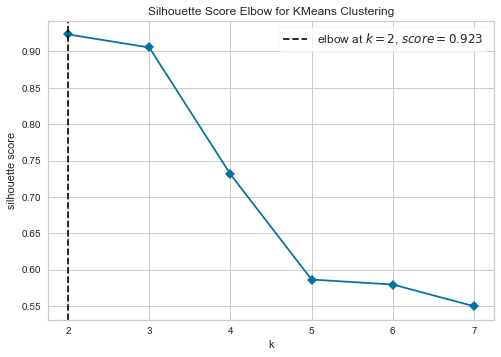

In [185]:
Elbow_M = KElbowVisualizer(KMeans(), k=clusters, timings=False, metric='silhouette');
Elbow_M.fit(train);
Elbow_M.show();

## 7.1 Silhouette Analysis

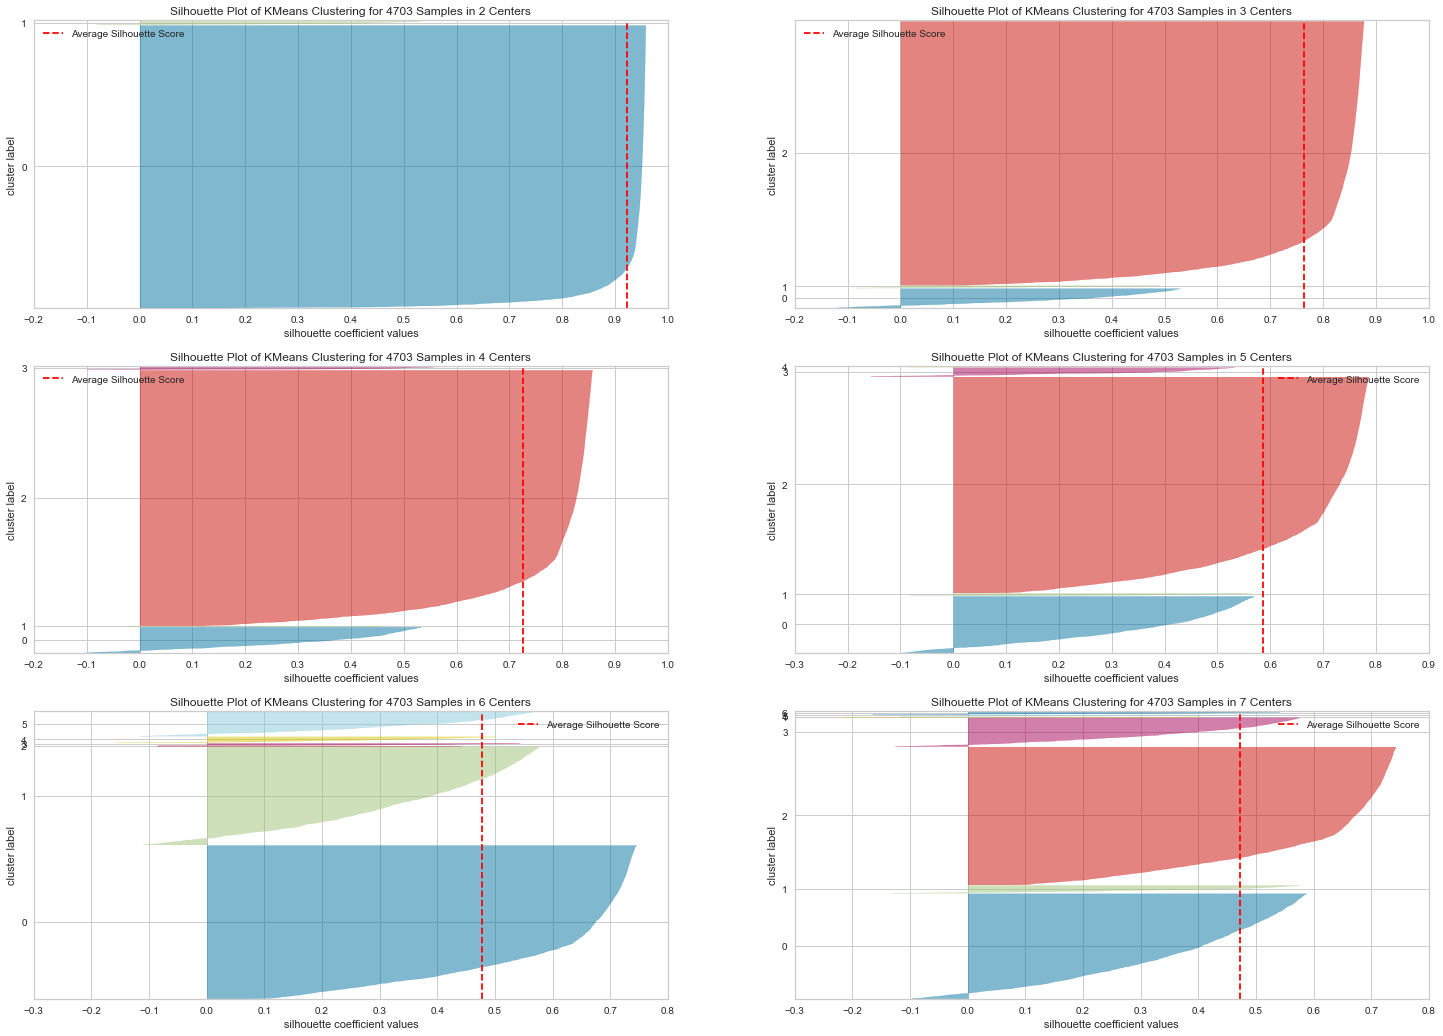

In [193]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18))
for k in clusters:
    km = KMeans(n_clusters=k,
                init='random',
                n_init=10,
                max_iter=100,
                random_state=42)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(train)
    visualizer.finalize()

# 8. Model Training

In [194]:
# Nº de clusters
k = 4

# Modelo
kmeans = KMeans(n_clusters=4,
                init='random',
                n_init=10,
                max_iter=100,
                random_state=42)

# Treinamento do Modelo
kmeans.fit(train)

# Clusters
labels = kmeans.labels_

In [197]:
# WCSS
print('WCSS value: {}'.format(kmeans.inertia_))

# SS
print('SS value: {}'.format(mt.silhouette_score(train, labels, metric='euclidean')))

WCSS value: 773316108.9798031
SS value: 0.7262610879872903


# 9. Cluster Analisys

In [198]:
df9 = df6.copy()
df9['label'] = labels
df9.head()

,customer_id,invoice_no,itens_qtt,total_qtt,total_invoice_price,invoice_date,country,invoice_day,invoice_month,invoice_year,label
0,14644,569239,18,192,643.26,2017-10-01,26,1,10,2017,2
1,18059,569240,5,80,114.96,2017-10-01,26,1,10,2017,2
2,14488,569241,44,775,1034.28,2017-10-01,26,1,10,2017,0
3,14193,569242,17,171,400.85,2017-10-01,26,1,10,2017,2
4,13344,569243,33,250,531.49,2017-10-01,26,1,10,2017,2


## 9.1 Visualization Inspection

D:\Users\gtvmi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


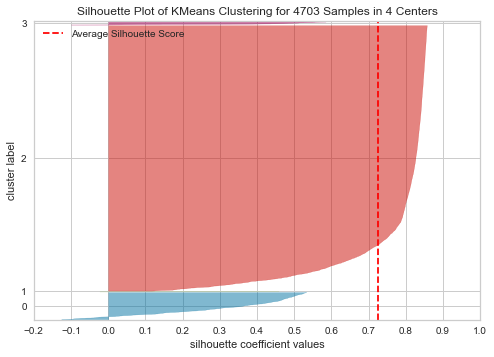

In [199]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(train)
visualizer.finalize()

## 9.2 2D Plod

In [200]:
df9.head()

,customer_id,invoice_no,itens_qtt,total_qtt,total_invoice_price,invoice_date,country,invoice_day,invoice_month,invoice_year,label
0,14644,569239,18,192,643.26,2017-10-01,26,1,10,2017,2
1,18059,569240,5,80,114.96,2017-10-01,26,1,10,2017,2
2,14488,569241,44,775,1034.28,2017-10-01,26,1,10,2017,0
3,14193,569242,17,171,400.85,2017-10-01,26,1,10,2017,2
4,13344,569243,33,250,531.49,2017-10-01,26,1,10,2017,2


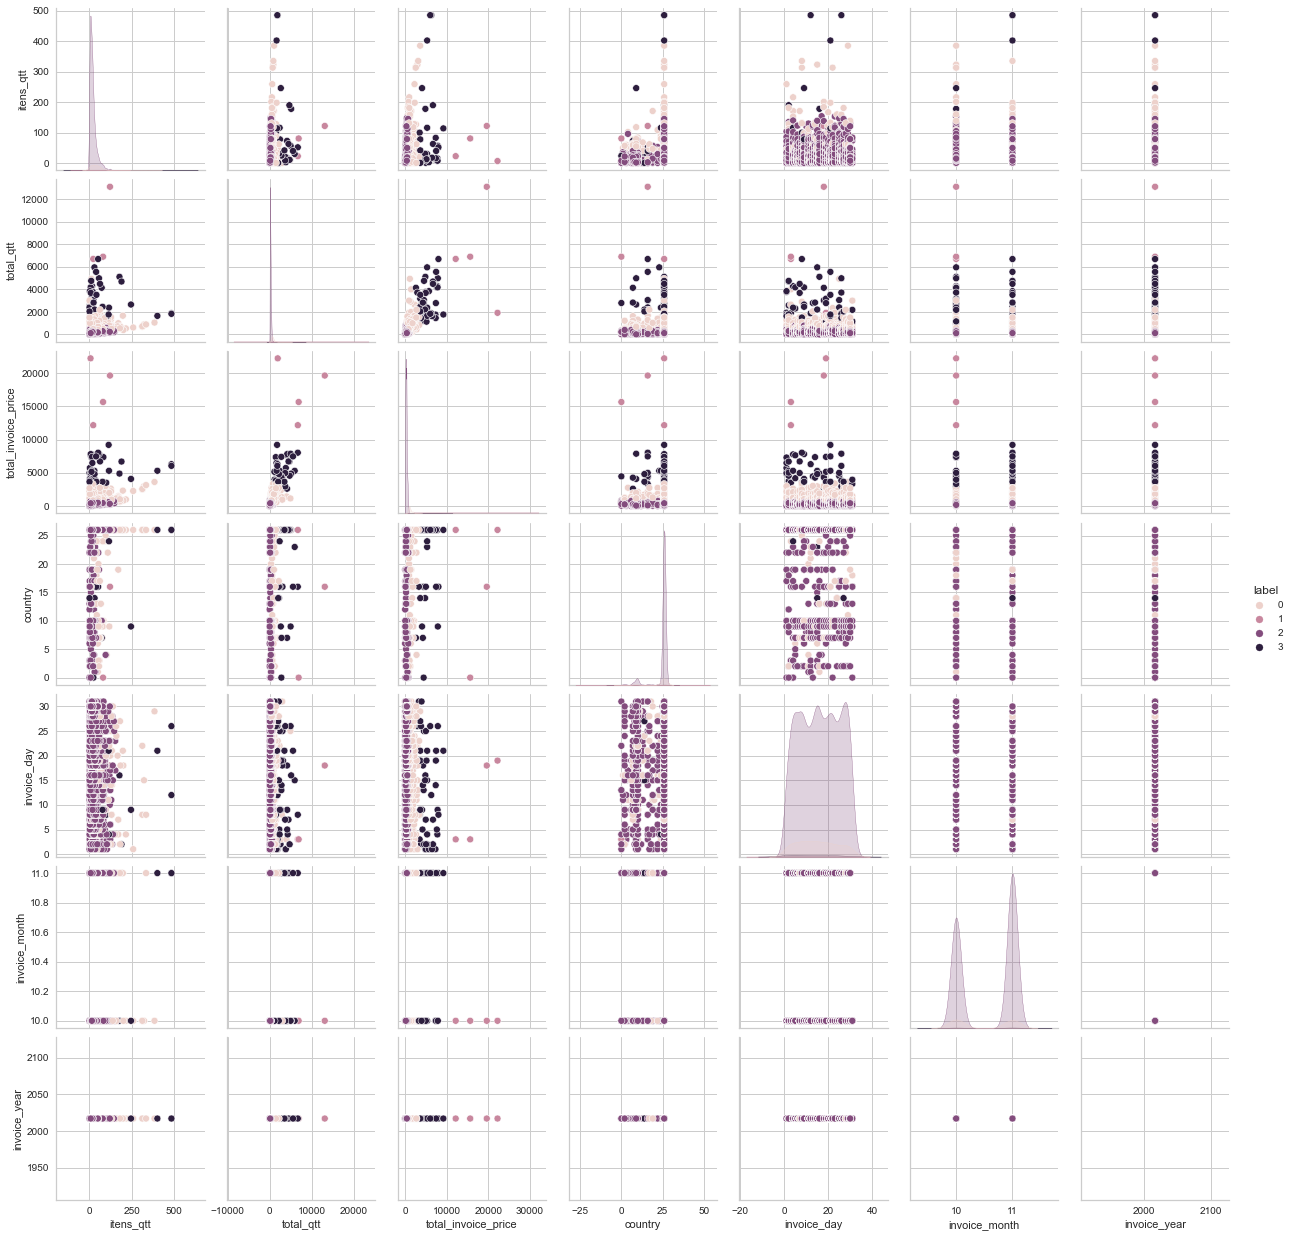

In [205]:
df_viz = df9.drop(columns=['customer_id', 'invoice_no'])
sns.pairplot(data=df_viz, hue='label')

# 9.3 UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

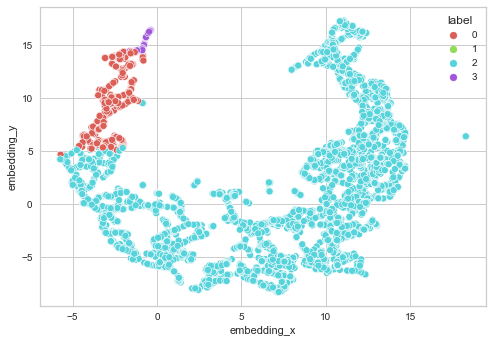

In [215]:
reducer = umap.UMAP( random_state=42, n_neighbors=5 )
embedding = reducer.fit_transform(train)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(data=df_viz,
                x = 'embedding_x',
                y = 'embedding_y',
                hue = 'label',
                palette = sns.color_palette('hls', n_colors=len(df_viz['label'].unique())))